# Name: Komalika Bhalerao
# LGMVIP Task-3
# Prediction Using Decision Tree Algorithm

In [10]:
import numpy as np
import pandas as pd
import sklearn.metrics as sm
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

In [11]:
Iris = pd.read_csv(r'C:\Users\sushmita\Downloads\Iris.csv')

In [12]:
Iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [13]:
Iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [14]:
Iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### Visualizing the data

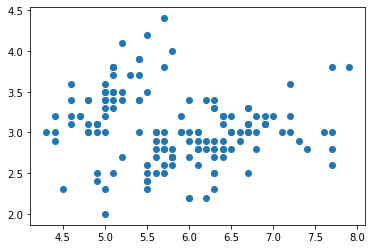

In [15]:
plt.scatter(Iris['SepalLengthCm'],Iris['SepalWidthCm'])

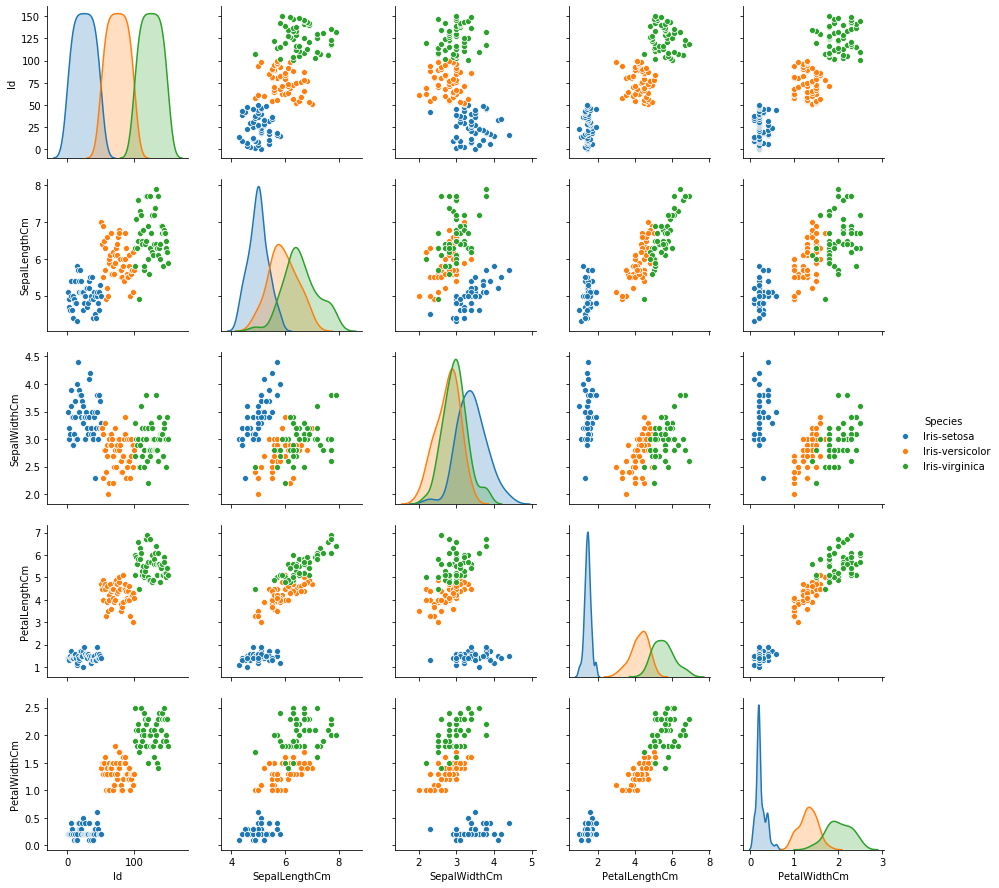

In [16]:
sns.pairplot(Iris, hue='Species')

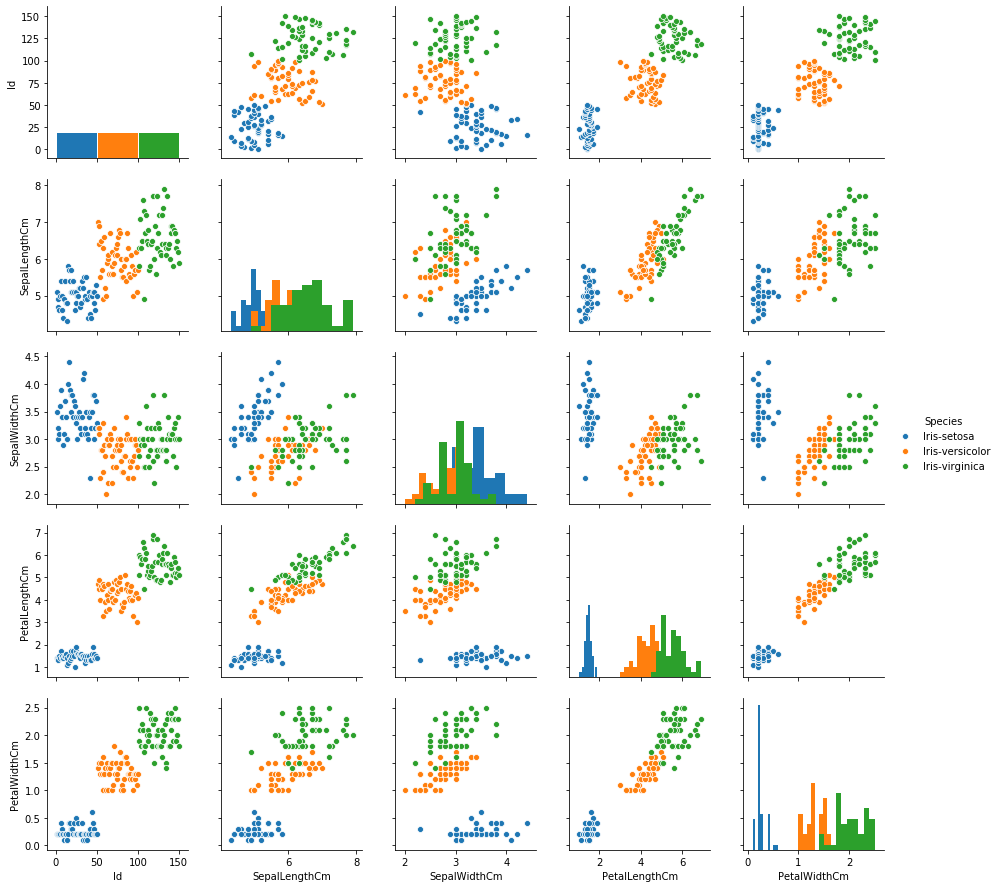

In [17]:
sns.pairplot(Iris, hue="Species", diag_kind ="hist")

### Correlation Matrix

In [18]:
Iris.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


### Heat Map

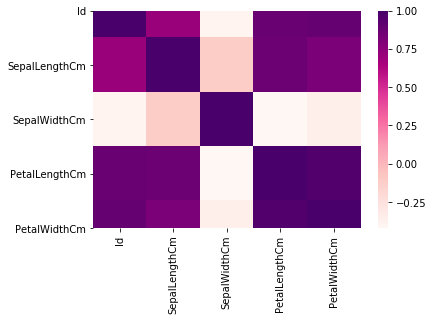

In [19]:
sns.heatmap(Iris.corr(), cmap="RdPu")

### Data Processing

In [20]:
target=Iris['Species']
df=Iris.copy()
df=df.drop('Species', axis=1)
df.shape

(150, 5)

In [21]:
x=Iris.iloc[:, [0,1,2,3]].values
LaEn=LabelEncoder()
Iris['Species']=LaEn.fit_transform(Iris['Species'])
y=Iris['Species'].values
Iris.shape

(150, 6)

### Training the model
### Splitting the data into Training and Testing set

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print("Training srt:",x_train.shape)
print("Testing set:",x_test.shape)

Training srt: (120, 4)
Testing set: (30, 4)


### Defining Decision Tree Algorithm

In [23]:
d_tree=DecisionTreeClassifier()
d_tree.fit(x_train,y_train)
print("Decision Tree Classifier created!")

Decision Tree Classifier created!


### Visualization of Trained Model

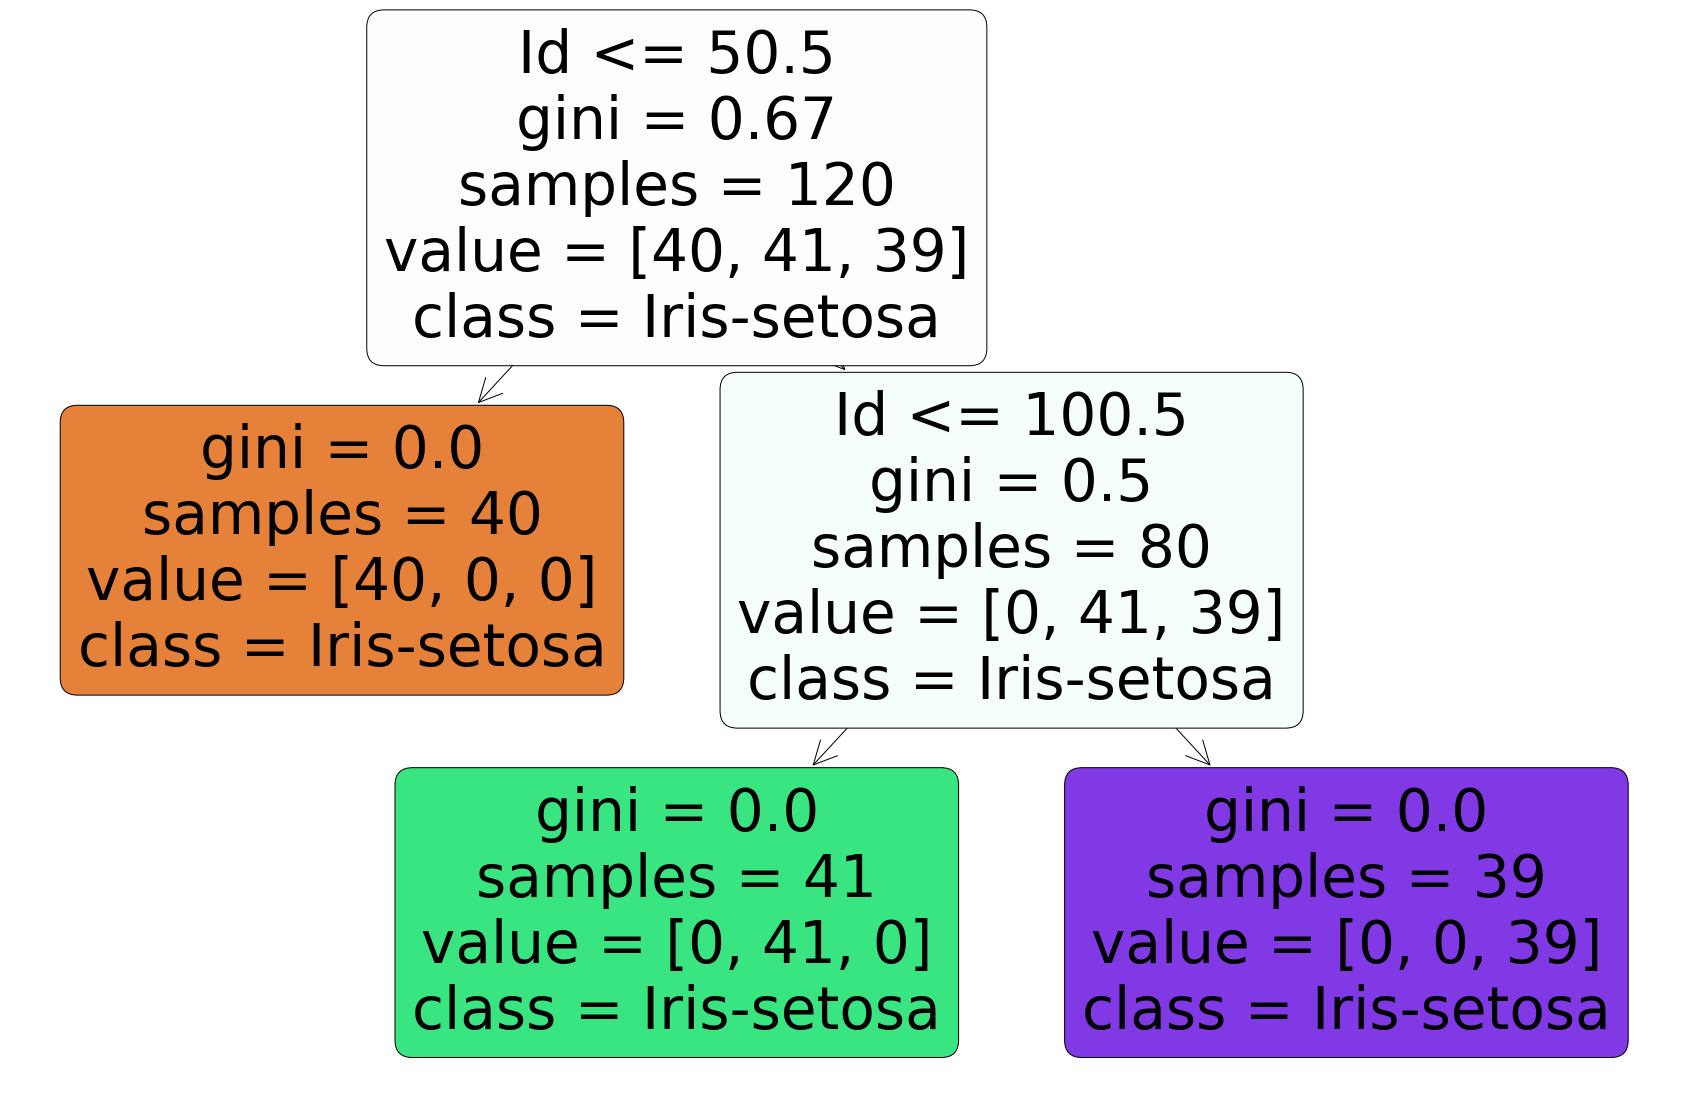

In [24]:
plt.figure(figsize=(30,20))
tree=plot_tree(d_tree,feature_names=df.columns,precision=2,rounded=True,filled=True,class_names=target.values)

### Classification Report

In [29]:
y_pred=d_tree.predict(x_test)
print("Classification Report:\n",classification_report(y_test,y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### Accuracy

In [30]:
print("Accuracy:",sm.accuracy_score(y_test,y_pred))

Accuracy: 1.0


### Confusion Matrix

In [31]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)